<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/CNN/Transfer_learning_(VGG_Net)_horses_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-03-20 10:51:33--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   126MB/s    in 0.7s    

2021-03-20 10:51:34 (126 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weight_file='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [4]:
pre_trained_model=InceptionV3(
    input_shape=(150,150,3),
    include_top=False,
    weights=None
)

In [5]:
pre_trained_model.load_weights(local_weight_file)

In [6]:
#make all the layer in model non trainable 
for layer in pre_trained_model.layers:
  layer.trainable=False

In [7]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
last_layer=pre_trained_model.get_layer('mixed10')
print('last layer shape is ',last_layer.output_shape)

last_output=last_layer.output

last layer shape is  (None, 3, 3, 2048)


In [18]:
# from tensorflow.keras.optimizers import RMSprop

# model=tf.keras.Sequential()
# model.add(layers.Flatten())(last_output)
# model.add(layers.Dense(1024,activation='relu'))
# model.add(layers.Dropout(0.2))
# model=model(pre_trained_model.input,x)

# model.compile(optimizers=RMSprop(lr=0.0001),
#               loss='binary_crossentropy',
#               metrics=['accuracy']
#               )
# model.summary()


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(
    optimizer=RMSprop(lr=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [19]:

# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 

--2021-03-20 11:13:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   151MB/s    in 0.9s    

2021-03-20 11:13:43 (151 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-03-20 11:13:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip='/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()


In [25]:
local_zip='/tmp/validation-horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

In [27]:
train_dir='/tmp/training'
validation_dir='/tmp/validation'

train_horse_dir=os.path.join(train_dir,'horses')
train_human_dir=os.path.join(train_dir,'humans')
validation_horse_dir=os.path.join(validation_dir,'horses')
validation_human_dir=os.path.join(validation_dir,'humans')

In [28]:
train_horses_fnames=os.listdir(train_horse_dir)
train_human_fnames=os.listdir(train_human_dir)
validation_horses_fnames=os.listdir(validation_horse_dir)
validation_human_fnames=os.listdir(validation_human_dir)

In [31]:
print(len(train_horses_fnames))
print(len(train_human_fnames))
print(len(validation_horses_fnames))
print(len(validation_human_fnames))

500
527
128
128


In [33]:
train_horses_fnames[0:5]

['horse35-9.png',
 'horse40-2.png',
 'horse47-9.png',
 'horse36-9.png',
 'horse31-2.png']

In [34]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    class_mode='binary',
    target_size=(150,150)
)

validation_datagen=ImageDataGenerator(
    rescale=1./255
)

validation_generator =validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=64,
    class_mode='binary',
    target_size=(150,150)
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [37]:
history = model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
17/17 [==============================] - 56s 3s/step - loss: 0.3312 - accuracy: 0.9270 - val_loss: 3.1425e-04 - val_accuracy: 1.0000
Epoch 2/20
17/17 [==============================] - 56s 3s/step - loss: 0.5382 - accuracy: 0.9338 - val_loss: 0.0076 - val_accuracy: 0.9961
Epoch 3/20
17/17 [==============================] - 56s 3s/step - loss: 0.0240 - accuracy: 0.9883 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/20
17/17 [==============================] - 55s 3s/step - loss: 0.1368 - accuracy: 0.9688 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/20
17/17 [==============================] - 56s 3s/step - loss: 0.1905 - accuracy: 0.9630 - val_loss: 0.0049 - val_accuracy: 0.9961
Epoch 6/20
17/17 [==============================] - 56s 3s/step - loss: 0.0866 - accuracy: 0.9825 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/20
17/17 [==============================] - 56s 3s/step - loss: 0.0608 - accuracy: 0.9786 - val_loss: 0.0051 - val_accuracy: 0.9961
Epoch 8/20
17/17

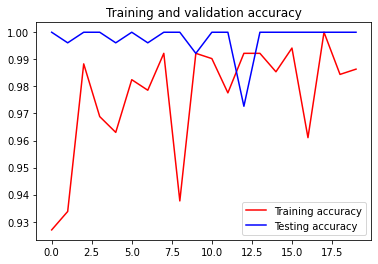

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Testing accuracy')

plt.title('Training and validation accuracy')

plt.legend(loc=0)

plt.figure()

plt.show()

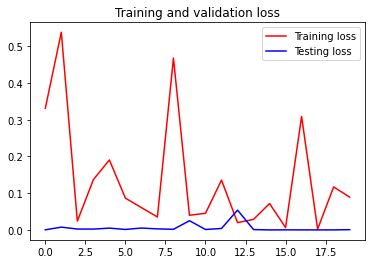

<Figure size 432x288 with 0 Axes>

In [43]:
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Testing loss')

plt.title('Training and validation loss')

plt.legend(loc=0)

plt.figure()

plt.show()